# Sprint6 決定木スクラッチ

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline
import time

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def scores(y_test,y_pred):
    print("accuracy",accuracy_score(y_test,y_pred))
    print("precision",precision_score(y_test,y_pred))
    print("recall",recall_score(y_test,y_pred))
    print("f1_score",f1_score(y_test,y_pred))
    print("conf_matrix",confusion_matrix(y_test,y_pred))

In [673]:
# iris data set
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris)

X_df = pd.DataFrame(iris.data,columns=iris.feature_names)

y_df = pd.DataFrame(iris.target,columns={'Species'})
df = pd.concat([X_df, y_df], axis=1)

#'virgicolor,'virginica'だけ抜き出す
aaa = df.query('Species == [1, 2]')
# print(aaa.head(3))
# aaa[aaa['Species']==1]= 'virgicolor' #名前 を 0,1,2 から setosa,virgicolor,virginica に変更
# aaa[aaa['Species']==2]= 'virginica'

X = aaa.drop('Species',axis=1).iloc[:, -2:].values  #4つ突っ込んでも大丈夫
X_new_df = pd.DataFrame(X,columns=iris.feature_names[:2])
# print(X)
y = aaa.loc[:,['Species']].values - 1 #1,2 ->0,1
y_new_df = pd.DataFrame(y,columns={'Species'})
y_new_df[y_new_df['Species']==0]= 'virgicolor' #名前 を 0,1,2 から setosa,virgicolor,virginica に変更
y_new_df[y_new_df['Species']==1]= 'virginica'
# print(y_new_df)

In [677]:
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [801]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,
                                                   stratify=y)

## 【問題1】ジニ不純度を求める関数

In [360]:
def gini(node): #nodeはarray型(c1,c2) *サンプル数
    node_sum = 0
    for i in range(len(node)):
        node_sum += (node[i-1]**2)/(np.sum(node)**2)
    return 1 - node_sum
#sum(条件(xについての場合) for x in array) ->array内でxについての条件を満たすものの数

#np.unique(node)
#for in　を使わない場合


In [744]:
right=np.array([20,5])
left=np.array([10,25])
gini(left+right)

0.5

## 【問題2】情報利得を求める関数

In [361]:
'''
n=ノードにおけるサンプル数
c1 がクラス１のサンプル数、c２がクラス２のサンプル数
X[i,0] #しきい値

しきい値以上をTrueとする。
array[array>= ]でTrueのみの行列、Falseのみの行列(1 - True)に分ける。
特徴量2行目は2行目でTrue,False。
ジニ係数を計算する。
これを全行全列の要素で実行。
特徴量ごとの最大値。
for文なくてもできるらしい
'''

#情報利得
# IG_P = gini(P) - p * gini(left) - (1-p) * gini(right)

def IG_p(left,right): #left,right は左右のarray型node(０ラベルの数,１ラベルの数)
    igp = gini(left+right) - \
    (np.sum(left) * gini(left) 
     + np.sum(right)* gini(right))/np.sum(left+right)
    return igp

In [362]:
right=np.array([20,5])
left=np.array([10,30])
IG_p(left,right)
sdtc._IG_p(left,th)

0.14319526627218931

In [363]:
# for idx, c in enumerate(c):
#     left[idx] = np.sum(left_ydata = c)

## 【問題3】深さ1の決定木分類器クラスの作成

In [364]:
#np.sort でソートしてからスプリット
#mask情報だけ保持していれば、y_pred 全体を保持しなくても良い。多数決するだけなので。
#list保持かクラス保持か
# deep learning でも有効な手法

In [812]:
# def karnel(X_i,X_j):
#     return np.dot(X_i, X_j.T) #shape ->特徴量*特徴量。jはiを転置させたもの

class ScratchDecesionTreeClassifier():
    """
    決定木のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """
    def __init__(self,max_depth=None,bias=True, verbose=True): #自動で走る部分
        # ハイパーパラメータを属性として記録　　　#初期値をここに入れる
        self.left = None
        self.right= None
        self.gini = None
        self.igp_max=None
        self.max_depth = max_depth
        self.q = None
        self.mod = None
        self.right_label =None
        self.left_label =None


    def _count01(self,y): #データ内の0,1数を計算できる関数_count01を作成。
        c1 = len(y[y ==0]) #y=0の要素数
        c2 = len(y[y ==1]) #y=１の要素数
        node = np.array([c1,c2])
        return node #nodeはarray型(c1,c2) *サンプル数

    def _gini(self,node): #nodeはarray型(c1,c2) *サンプル数
        node_sum = 0
        for i in range(len(node)):
            node_sum += (node[i-1]**2)/(np.sum(node)**2)
        return 1 - node_sum

    def _IG_p(self,left,right): #left,right は左右のarray型node(０ラベルの数,１ラベルの数)
        igp = gini(left+right) - \
        (np.sum(left) * gini(left)
         + np.sum(right)* gini(right))/np.sum(left+right)
        return igp

    def fit(self, X, y, X_val=None, y_val=None):
        """
        検証用データが入力された場合はそれに対する
        損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # Xの要素を各行ごとに全サンプル閾値とする
        #各行でsortして閾値上下グループそれぞれの０、１の数を 関数_count01で計算。
        igp_list =[]
        class_label_left=[]
        class_label_right=[]
        
        for i in range(X.shape[1]):
            sort_index = np.argsort(X[:,i])
            X = X[sort_index]#sort
#             print(X)
            y = y[sort_index]
            for j in range(X.shape[0]-1): # Xの要素X[j-1,i]を全サンプル閾値とする
                y_left, y_right = np.split(y, [j+1])
#                 print(y_left, y_right)
                #splitでX[j,i]より上と以下に分ける(j-1番目まで)
                #閾値上下グループそれぞれの０、１の数を 関数_count01で計算
                left = self._count01(y_left)
                right = self._count01(y_right)
                """
                left,right 合わせたものの最大値を取る
                →最大値をラベル付け、残りがもう片方
                ただし、ラベルはグラフ描画にしか使わないので0,1どちらでも良い
                """
#                 print(left,right)
                if left[0]>left[1]:
                    class_label_left.append(0)
                    class_label_right.append(1)
                else:
                    class_label_left.append(1)
                    class_label_right.append(0)
                
                #IG_pをfor文でぶん回す。self._IG_p(left,right)内で親ノードのginiも計算
                igp_list.append(self._IG_p(left,right))
#         print("閾値で切った時の左側がこのラベル",class_label_left)
        
        #多数決

        #self._IG_pの結果を該当x部分をlistで保持する。
#         print(igp_list)
        #結果listの中で最大のものを検索
#         print(igp_list)
        self.igp_max = igp_list.index(max(igp_list)) #indexで保持
        print("情報利得max:",max(igp_list))
        print("閾値のインデックス番号:", self.igp_max)
#         print(class_label_left[self.igp_max])
        self.left_label =class_label_left[self.igp_max]
        self.right_label =class_label_right[self.igp_max]

        """
        class_label_leftdown #listで保持-> index　self.igp_max　抜き出す。
        閾値で切った時の左側がこのラベル
        """
        
        
        # (self.igp_max をX.shape[0]で割った解)行めの特徴量の(余り)番目
        #self.q でsortして、self.mod番目
        self.q, self.mod = divmod(self.igp_max,X.shape[0])
        self.X_slice =X[self.mod,self.q]
        print("閾値:",self.X_slice)
        """
        class_label_left.append( #0,1多い方のラベル)  がインデックス
        """
        

        #ジニ不純度が0になるノード、または指定された深さのノードは葉と呼ばれます。
        #葉にはそれぞれ推定時にどのクラスに分類するかを記録しておきます。
        #ジニ不純度が0でない場合は、多数決により分類するクラスを決定します。
        
        
    def predict(self, X):
        """
        print(X[self.mod,self.q]) で線を引く。
        """
        print(X[:,self.q])
        index_left =np.where(X[:,self.q] > self.X_slice) 
        index_right =np.where(X[:,self.q] <= self.X_slice) 
#         print(index_left)
#         print(index_right)
        
        y_pred = np.zeros(X.shape[0])
        y_pred[index_left]=self.left_label
        y_pred[index_right]=self.right_label
        print(y_pred)
#         print(y_pred.shape)
        return y_pred #index, 
    

In [813]:
print(X_train.shape)
sdtc = ScratchDecesionTreeClassifier()
sdtc.fit(X_train,y_train)

(30, 2)
情報利得max: 0.07692307692307687
閾値のインデックス番号: 3
閾値: -3.0603


In [814]:
sdtc.X_slice
w = np.where(X[:,1] > sdtc.X_slice)
y_pred = np.zeros(X.shape[0])
y_pred[w] =1
print(y_pred)

[1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]


In [815]:
# print(X_test.shape)
# print(y_test)
# print(y_test.dtype)
y_pred = sdtc.predict(X_test)
# print(y_pred)
# print(y_pred.dtype)

[-6.6797    0.10645   1.4771    0.35084  -0.44699   0.5461   -0.80647
 -0.65259   0.057313  0.86291 ]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 【問題6】指標値の算出

In [816]:
scores(y_test,y_pred)

accuracy 0.6
precision 1.0
recall 0.2
f1_score 0.33333333333333337
conf_matrix [[5 0]
 [4 1]]


## 【問題7】決定領域の可視化

[-7.1797 -7.1697 -7.1597 ...  1.9503  1.9603  1.9703]
[1. 1. 1. ... 0. 0. 0.]


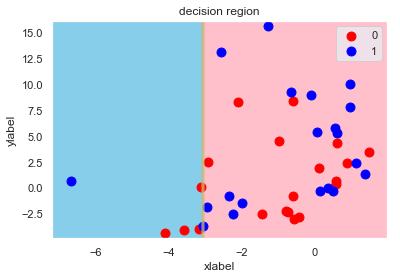

In [817]:
decision_region(X, y, sdtc, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1'])

[-7.1797 -7.0797 -6.9797 ...  1.7203  1.8203  1.9203]
[1. 1. 1. ... 0. 0. 0.]
[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


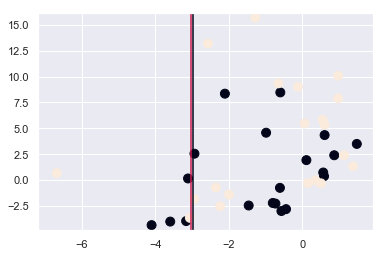

In [818]:
plot_decision_regions(X,y, sdtc)

In [819]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [705]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

# 可視化関数
def plot_decision_regions(X,y, model):
    plt.scatter(X[:,0], X[:,1], s=80, c=y, marker='o')
    
    #サポートベクターも同様にプロット
    step = 0.1
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]

    pred = model.predict(mesh).reshape(mesh_f0.shape)
    print(pred)
    plt.contour(mesh_f0, mesh_f1, pred, 1)
    plt.show()

## メモ

In [86]:
'''
# エントロピー
I_H = lambda p1, p2: - p1 * np.log2(p1) /2 - p2 * np.log2(p2)/2
result_ih = np.array([I_H(p1, p2) for p1, p2 in zip(list(p1), list(p2))])
result_ih[np.isnan(result_ih)] = 0

# ジニ不純度
I_G = lambda p1, p2: 1 - p1*p1 - p2*p2
result_ig = np.array([I_G(p1, p2) for p1, p2 in zip(list(p1), list(p2))])
result_ig[np.isnan(result_ig)] = 0

# ジニ不純度
def gini_impurity(target: np.ndarray, classes: Set[Any]) -> float:
    ret = 1.0
    if len(target) == 0:
        return ret
    for _class in classes:
        ret -= (len(target[target == _class]) / len(target))**2
    return ret
'''

'\n# エントロピー\nI_H = lambda p1, p2: - p1 * np.log2(p1) /2 - p2 * np.log2(p2)/2\nresult_ih = np.array([I_H(p1, p2) for p1, p2 in zip(list(p1), list(p2))])\nresult_ih[np.isnan(result_ih)] = 0\n\n# ジニ不純度\nI_G = lambda p1, p2: 1 - p1*p1 - p2*p2\nresult_ig = np.array([I_G(p1, p2) for p1, p2 in zip(list(p1), list(p2))])\nresult_ig[np.isnan(result_ig)] = 0\n\n# ジニ不純度\ndef gini_impurity(target: np.ndarray, classes: Set[Any]) -> float:\n    ret = 1.0\n    if len(target) == 0:\n        return ret\n    for _class in classes:\n        ret -= (len(target[target == _class]) / len(target))**2\n    return ret\n'

In [ ]:
def count01(y):
    c1 = len(y[y ==0]) #y=0の要素数
    c2 = len(y[y ==1]) #y=１の要素数
    node = np.array([c1,c2])
    return node

In [84]:
for i in range(X.shape[0]):
    if len(y[y==0]) is not None:
        if len(y[y==0]) is not None:
            
            index_X = X[:,0] <= X[i,0] 
            y_smaller = y[index_X] #要素より小さい方(境界の左または下側)
            c1 = len(y_smaller[y_smaller ==0]) #y=0の要素数

            #sum(条件(xについての場合) for x in array) ->条件を満たすものの数
            y_smaller_sum = sum(y==0 for y in y) 

            I_G_smaller = 1 - ((y_smaller_0/len(y_smaller))**2 
                               + (1-y_smaller_0/len(y_smaller))**2) #gini_smaller
            y_bigger = y[X[:,0] >= X[i,0] ] #要素より大きい方(境界の右または上側)
            y_bigger_0 = len(y_bigger[y_bigger ==0])
            c2 = 1 - ((y_bigger_0/len(y_bigger))**2 + (1-y_bigger_0/len(y_bigger))**2) #gini_bigger
    

    
    
    
1-(c1+c2)
# print(X[:,0])
# print(X)

[[0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 